In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df_total = pd.read_excel("/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Databehandling/Data/komtopp50_2020.xlsx", sheet_name="Totalt")
df_male = pd.read_excel("/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Databehandling/Data/komtopp50_2020.xlsx", sheet_name="Män")
df_female = pd.read_excel("/Users/luddecmc/Desktop/SKOLARBETE-ITHS/repos/AI24-Databehandling/Data/komtopp50_2020.xlsx", sheet_name="Kvinnor")

df_headers = ["rang 2020","rang 2019","kommun","folkmängd 2020","folkmängd 2019","förändring"]

def clean_data(data):    
    data.dropna(inplace=True)
    data.columns = df_headers

    # data.sort_values(by="folkmängd 2020", ascending=False, inplace=True)
    return data



df_total = clean_data(df_total)
df_female = clean_data(df_female)
df_male = clean_data(df_male)


In [70]:
df_male["Kön"] = "Man"
df_male.head()

,rang 2020,rang 2019,kommun,folkmängd 2020,folkmängd 2019,förändring,Kön
6,81,83.0,Ale,16256,16054.0,1.258253,Man
7,64,64.0,Alingsås,20702,20646.0,0.271239,Man
8,122,123.0,Alvesta,10367,10339.0,0.270819,Man
9,255,255.0,Aneby,3503,3498.0,0.142939,Man
10,169,168.0,Arboga,7094,7114.0,-0.281136,Man


In [71]:
df_female["Kön"] = "Kvinna"
df_female.head()


,rang 2020,rang 2019,kommun,folkmängd 2020,folkmängd 2019,förändring,Kön
6,84,85.0,Ale,15612,15348.0,1.720094,Kvinna
7,64,64.0,Alingsås,20900,20774.0,0.606527,Kvinna
8,123,123.0,Alvesta,9857,9795.0,0.632976,Kvinna
9,255,255.0,Aneby,3318,3350.0,-0.955224,Kvinna
10,165,164.0,Arboga,6945,6973.0,-0.401549,Kvinna


In [72]:
df_merged_genders = pd.concat([df_male,df_female], axis=0, ignore_index=True)
df_merged_genders.drop(columns=["rang 2020", "rang 2019"], inplace=True)
# df_merged_genders.set_index("kommun", inplace=True)
df_merged_genders

,kommun,folkmängd 2020,folkmängd 2019,förändring,Kön
0,Ale,16256,16054.0,1.258253,Man
1,Alingsås,20702,20646.0,0.271239,Man
2,Alvesta,10367,10339.0,0.270819,Man
3,Aneby,3503,3498.0,0.142939,Man
4,Arboga,7094,7114.0,-0.281136,Man
...,...,...,...,...,...
575,Österåker,22997,22442.0,2.473042,Kvinna
576,Östhammar,10846,10803.0,0.398038,Kvinna
577,Östra Göinge,7270,7262.0,0.110162,Kvinna
578,Överkalix,1559,1578.0,-1.204056,Kvinna


In [73]:
df_total = df_total.drop(columns=["rang 2020", "rang 2019"])

In [74]:

df_total = df_total.rename(columns = {"folkmängd 2020": "total pop 2020", "folkmängd 2019": "total pop 2019", "förändring": "total förändring"})
df_total

,kommun,total pop 2020,total pop 2019,total förändring
6,Ale,31868,31402.0,1.483982
7,Alingsås,41602,41420.0,0.439401
8,Alvesta,20224,20134.0,0.447005
9,Aneby,6821,6848.0,-0.394276
10,Arboga,14039,14087.0,-0.34074
...,...,...,...,...
291,Österåker,46644,45574.0,2.34783
292,Östhammar,22251,22250.0,0.004494
293,Östra Göinge,15017,15007.0,0.066636
294,Överkalix,3289,3315.0,-0.784314


In [75]:
df_merged_tot_gen = pd.merge(df_merged_genders,df_total)
df_merged_tot_gen = df_merged_tot_gen.sort_values(by="total pop 2020", ascending=False)

df_merged_tot_gen.reset_index(drop=True, inplace=True)

df_merged_tot_gen


,kommun,folkmängd 2020,folkmängd 2019,förändring,Kön,total pop 2020,total pop 2019,total förändring
0,Stockholm,482982,482220.0,0.158019,Man,975551,974073.0,0.151734
1,Stockholm,492569,491853.0,0.145572,Kvinna,975551,974073.0,0.151734
2,Göteborg,292505,290308.0,0.756782,Man,583056,579281.0,0.65167
3,Göteborg,290551,288973.0,0.546072,Kvinna,583056,579281.0,0.65167
4,Malmö,172538,170623.0,1.122357,Man,347949,344166.0,1.099179
...,...,...,...,...,...,...,...,...
575,Dorotea,1171,1195.0,-2.008368,Kvinna,2498,2551.0,-2.077617
576,Sorsele,1157,1170.0,-1.111111,Kvinna,2442,2489.0,-1.888309
577,Sorsele,1285,1319.0,-2.57771,Man,2442,2489.0,-1.888309
578,Bjurholm,1154,1159.0,-0.431406,Kvinna,2387,2408.0,-0.872093


In [76]:
def percentual_difference(A, B):
    per_dif = (A - B) / (A + B)
    return per_dif




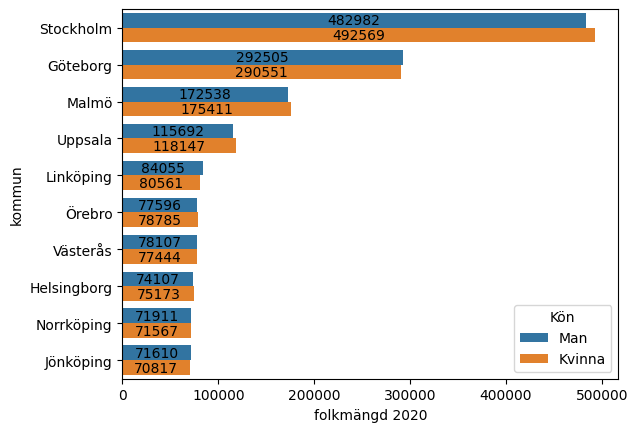

In [77]:
#barplot showing gender populations of swedens 10 largest and 10 smallest cities
ten_largest = df_merged_tot_gen.loc[:19]
ten_smallest = df_merged_tot_gen.iloc[-20:]
ax = sns.barplot(ten_largest, x="folkmängd 2020", y="kommun",hue="Kön" )
# ax = sns.barplot(ten_smallest, x="folkmängd 2020", y="kommun",hue="Kön" )
for container in ax.containers:
    ax.bar_label(container, label_type="center")


Text(0.5, 1.0, 'Fördelning av kön 2020 (alternativt vattenfalls logga)')

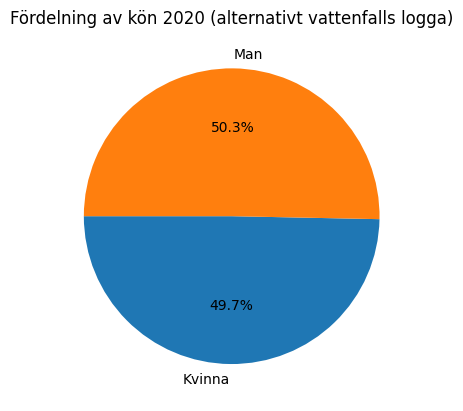

In [122]:
# pal = sns.color_palette("muted")
# plt.pie(total_pop_by_genders.iloc[], labels= total_pop_by_genders.iloc[:,0], colors=pal)
total_pop_by_genders = df_merged_tot_gen.groupby("Kön")["folkmängd 2020"].sum()

labels = total_pop_by_genders.index
sizes = total_pop_by_genders.values 
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=180)
plt.title("Fördelning av kön 2020 (alternativt vattenfalls logga)")


Text(0.5, 1.0, 'högsta percentuella könsskillnader')

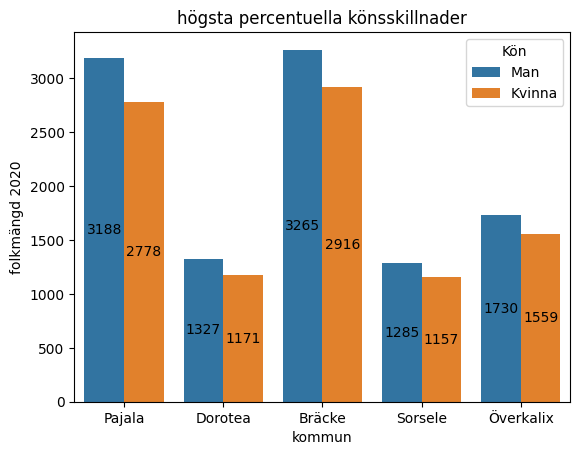

In [190]:
# först ta ut kommun, kön i pivot som 2 kolumner, total pop
# kalkylera största skillnad per rad, lägg in som egen column
filtered_df = df_merged_tot_gen[["kommun","folkmängd 2020","Kön","total pop 2020"]]

pivoted_df = filtered_df.pivot_table(
        index=["kommun", "total pop 2020"],  # Keep 'kommun' and 'total pop 2020' as the index
        columns="Kön",                        # Pivot on the 'Kön' column
        values="folkmängd 2020"               # Take values from 'folkmängd 2020'
    ).reset_index()
pivoted_df['differans'] = ((pivoted_df['Man'] - pivoted_df['Kvinna']) / pivoted_df['Kvinna']) * 100

melted_df = pivoted_df.melt(id_vars=["kommun", "total pop 2020", "differans"], #This specifies the columns to keep fixed
                     value_vars=["Man", "Kvinna"], # These are the columns you want to unpivot (Kvinna and Man).
                     var_name="Kön", #This is the name for the new column that will contain the variable names (in this case, gender).
                     value_name="folkmängd 2020") #: This is the name for the new column that will contain the values (the corresponding populations).

melted_df = melted_df.sort_values(by="differans", ascending=False)
melted_df = melted_df.iloc[:10]

ax = sns.barplot(melted_df, x="kommun", y="folkmängd 2020",hue="Kön")
for container in ax.containers:
    ax.bar_label(container, label_type="center")
plt.title("högsta percentuella könsskillnader")



<Axes: xlabel='kommun', ylabel='total förändring'>

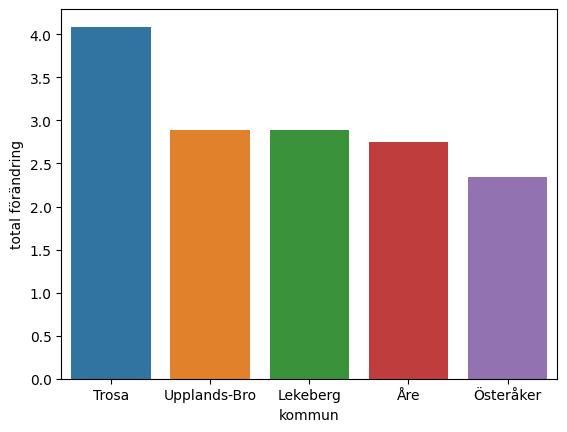

In [198]:
gdf=df_total.sort_values(by="total förändring", ascending=False)
gdf = gdf.head(5)
sns.barplot(gdf, y="total förändring", x="kommun", hue="kommun")

